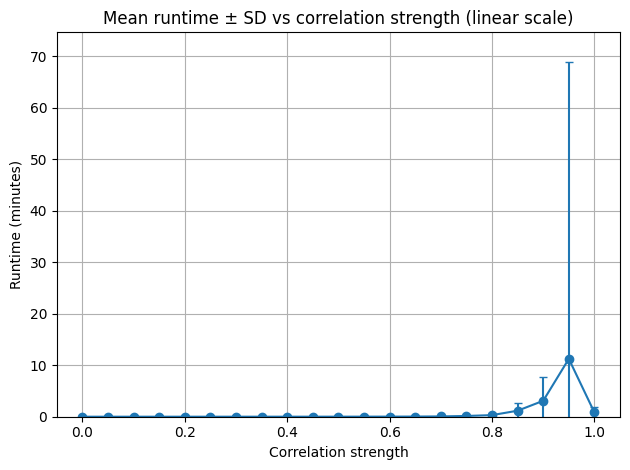

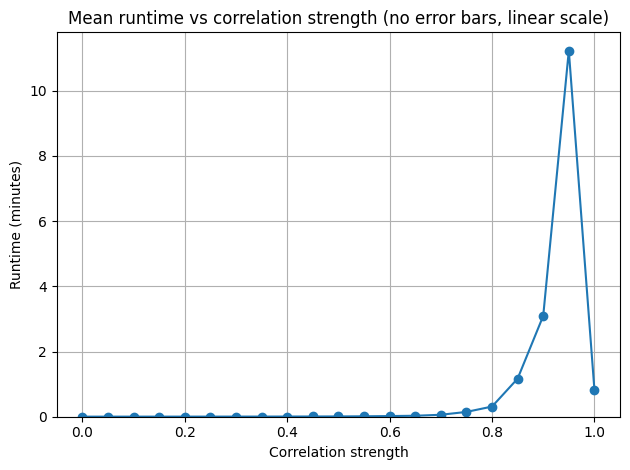

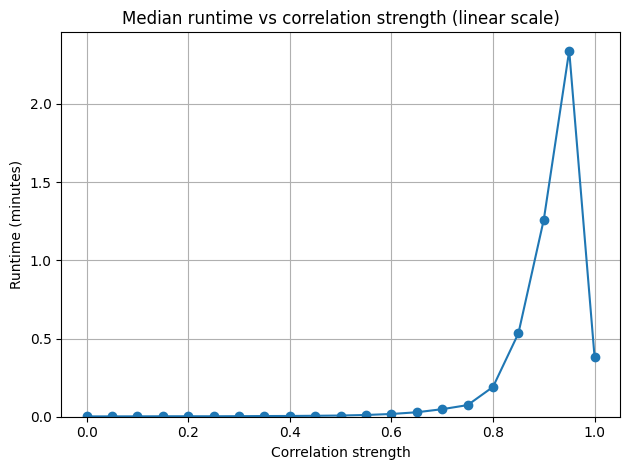

In [3]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt

# This file contains the data (runtimes) for correlated valuations,
# with n=8 agents and m = 160 items. The data contains the mean, the standard deviation,
# and the median taken over 100 random instances for each correlation strength (the
# correlation strength goes from 0 to 1 in steps of 0.05).

# ====== Hardcoded data (seconds) ======
CORRELATION = [0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45,
               0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00]
MEAN_SEC = [0.13, 0.15, 0.16, 0.18, 0.19, 0.20, 0.24, 0.27, 0.34, 0.42,
            0.54, 0.78, 1.22, 1.78, 3.60, 8.84, 18.69, 70.08, 185.55, 673.91, 49.88]
SD_SEC = [0.05, 0.07, 0.07, 0.08, 0.07, 0.10, 0.11, 0.12, 0.19, 0.22,
          0.36, 0.50, 0.81, 1.41, 2.99, 10.39, 20.83, 90.81, 274.18, 3457.02, 63.43]
MEDIAN_SEC = [0.12, 0.13, 0.14, 0.17, 0.18, 0.17, 0.21, 0.26, 0.29, 0.36,
              0.46, 0.67, 1.05, 1.71, 2.89, 4.46, 11.44, 31.99, 75.62, 140.41, 22.75]

# ====== Settings ======
OUTPUT_UNITS = "minutes"   # change to "seconds" if preferred
SHOW_NO_ERROR_PLOT = True  # also output mean-only (no error bars)

def to_units(arr, units):
    arr = np.array(arr, dtype=float)
    return arr / 60.0 if units == "minutes" else arr

def main():
    x = np.array(CORRELATION, dtype=float)
    mean_vals = to_units(MEAN_SEC, OUTPUT_UNITS)
    sd_vals = to_units(SD_SEC, OUTPUT_UNITS)
    median_vals = to_units(MEDIAN_SEC, OUTPUT_UNITS)

    # Plot 1: Mean ± SD with symmetric error bars on a linear axis
    plt.figure()
    plt.errorbar(x, mean_vals, yerr=sd_vals, fmt='o-', capsize=3)
    plt.xlabel('Correlation strength')
    plt.ylabel(f'Runtime ({OUTPUT_UNITS})')
    plt.title('Mean runtime ± SD vs correlation strength (linear scale)')
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.savefig('runtime_mean_sd_linear.png', dpi=200)

    # Optional: Mean without error bars
    if SHOW_NO_ERROR_PLOT:
        plt.figure()
        plt.plot(x, mean_vals, marker='o')
        plt.xlabel('Correlation strength')
        plt.ylabel(f'Runtime ({OUTPUT_UNITS})')
        plt.title('Mean runtime vs correlation strength (no error bars, linear scale)')
        plt.grid(True)
        plt.ylim(bottom=0)
        plt.tight_layout()
        plt.savefig('runtime_mean_noerr_linear.png', dpi=200)

    # Plot 2: Median
    plt.figure()
    plt.plot(x, median_vals, marker='o')
    plt.xlabel('Correlation strength')
    plt.ylabel(f'Runtime ({OUTPUT_UNITS})')
    plt.title('Median runtime vs correlation strength (linear scale)')
    plt.grid(True)
    plt.ylim(bottom=0)
    plt.tight_layout()
    plt.savefig('runtime_median_linear.png', dpi=200)

    plt.show()

if __name__ == "__main__":
    main()
